# Speech Pipeline Quick Test
- 确保已在环境变量中设置 `DEEPSEEK_API_KEY`（可选：`DEEPSEEK_BASE_URL`）。
- 模型需已下载至 `/home/zhuran/ran/OpenMic/models`。
- 默认启用语气词插入与 LLM 改写，可在代码中关闭。

In [1]:
import sys
import os

# Add project root to sys.path to import src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.speech.pipeline import StandupSpeechPipeline
from IPython.display import Audio

# 设置 LLM Key（注意变量名）
os.environ["DEEPSEEK_API_KEY"] = "sk-fcae079e57564b4d983ab178ddaa2552"
# 如需自定义网关，取消注释下一行
# os.environ["DEEPSEEK_BASE_URL"] = "https://api.deepseek.com"

# Initialize the pipeline
# Ensure you have the models downloaded at the specified path
pipeline = StandupSpeechPipeline(model_path="/home/zhuran/ran/OpenMic/models", device="cuda")

/home/zhuran/.conda/envs/openmic/lib/python3.11/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/home/zhuran/.conda/envs/openmic/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/zhuran/.conda/envs/openmic/lib/python3.11/site-packages/jieba/_compat.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Loading ChatTTS from /home/zhuran/ran/OpenMic/models...


In [4]:
# Define sample raw text (with stage directions)
raw_text = """朋友们，大家好！今天我想跟大家聊聊**语言不通**这件事。（*停顿*）我发现啊，人类发明了这么多语言，可能就是为了（*重音*）**阻止**我们互相理解。（*转为分享秘密的语气，身体前倾*）（铺垫）咱们这代人，谁还没经历过几次（*重音*）“**社死**”级别的语言不通现场？只因你太美！Baby！迎面走来的你让我如此蠢蠢欲动，这种感觉我从未有 cause I got a crush on you baby!"""


In [6]:
# Run the pipeline: Refine Text -> Synthesize
audio_data = pipeline.run(raw_text)

Refining text...


Refined text segments: 4
Synthesizing audio...
EmotionRhythmController: analyzing controls for 4 segments.


found invalid characters: {'！', '[', ']'}
text:   1%|▏         | 27/2048(max) [00:00, 94.22it/s]
code:   6%|▌         | 243/4096(max) [00:02, 107.18it/s]
found invalid characters: {'[', ']'}
text:   2%|▏         | 35/2048(max) [00:00, 109.14it/s]
code:   8%|▊         | 316/4096(max) [00:02, 108.23it/s]
found invalid characters: {'[', '？', ']'}
text:   2%|▏         | 32/2048(max) [00:00, 108.61it/s]
code:   7%|▋         | 282/4096(max) [00:02, 109.04it/s]
found invalid characters: {'！', '[', ']'}
text:   2%|▏         | 48/2048(max) [00:00, 109.66it/s]
code:  12%|█▏        | 502/4096(max) [00:04, 108.90it/s]


Audio generated, shape: (784017,)


In [7]:
# Play the generated audio
# Note: ChatTTS usually outputs at 24kHz
Audio(audio_data, rate=24000, autoplay=True)

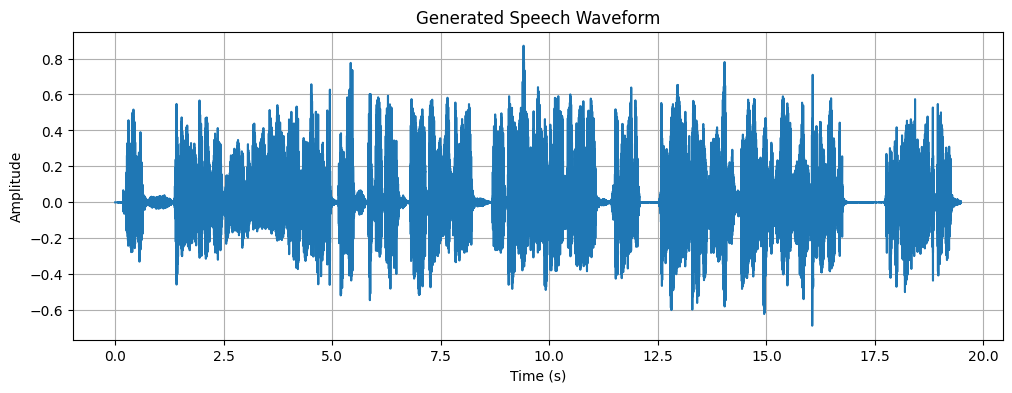

In [ ]:
# 可视化波形
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(audio_data) / 24000, num=len(audio_data)), audio_data)
plt.title("Generated Speech Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [ ]:
# Optional: Inspect refined text to see what the LLM generated
refined_text = pipeline.refine_text(raw_text)
print("Refined Text Segments:")
for i, line in enumerate(refined_text):
    print(f"{i+1}: {line}")

Refined Text Segments:
1: 朋友们，大家好！今天我想跟[[uv_break]]你知道吧大家聊聊[[uv_break]]呃语言不通这件事。 [[uv_break]] 我发现啊，人类发明了这么多语言，可能就是为了阻止我们互相理解。
2: 咱们这代人，谁还没经历过几次“社死”级别的语言不通现场？
3: 只因你太美！Baby！
